# Import Library

In [1]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so
from matplotlib.ticker import FuncFormatter

# Dataframe Library and numpy
import numpy as np
import pandas as pd

# Database Library
import duckdb

# Set to display a specific number of rows
pd.set_option('display.max_rows', 100)

# Set to display all rows (no limit)
pd.set_option('display.max_columns', 50)

# Database Connection

Our database materilized in "database" directory and for this visualization task, we need to get both table that we already put into the databse

In [2]:
# Database Connection

conn = duckdb.connect(database="database/verihubs.duckdb", read_only=True)

# Print List of Tables in the Database
conn.execute("SHOW TABLES").df()

,name
0,daily_order_status
1,monthly_category_sales
2,raw_amazon_data


# Visualization

***Disclosure***

1. Since the task only required to create visualization, i passed ***Data Cleaning*** part for this. But, in ***TL:DR*** i will do it to summarize additional insight!
2. All of the task visualization will use ***Matplotlib***

## Visualization #1

The first task required us to create visualization about Daily order by Status

In [3]:
# table read and convert into dataframe
df_daily_order = conn.execute("SELECT * FROM daily_order_status").df() # table that we use is daily_order_status

df_daily_order.head() # show the top 5 rows of the dataframe just for an overview of the data

,day,Status,order_count
0,2022-03-31,Cancelled,18
1,2022-03-31,Shipped,123
2,2022-03-31,Shipped - Delivered to Buyer,16
3,2022-03-31,Shipped - Returned to Seller,1
4,2022-04-01,Cancelled,221


For this first visualization, i want to use stacked-bar chart to visualize the data. Stacked-bar chart in matplotlib required us to create it from pivot-table so the first step here is to change the format into pivot table

In [4]:
df_daily_pivot = df_daily_order.pivot_table(index='day', columns='Status', values='order_count') # pivot the dataframe to match matplotlib requirement

df_daily_pivot.head()

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
day,,,,,,,,,,,,,
2022-03-31,18.0,NaN,NaN,123.0,NaN,16.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2022-04-01,221.0,NaN,NaN,893.0,NaN,228.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN
2022-04-02,239.0,NaN,NaN,967.0,NaN,235.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN
2022-04-03,225.0,NaN,NaN,1025.0,NaN,294.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN
2022-04-04,182.0,1.0,NaN,899.0,NaN,279.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN


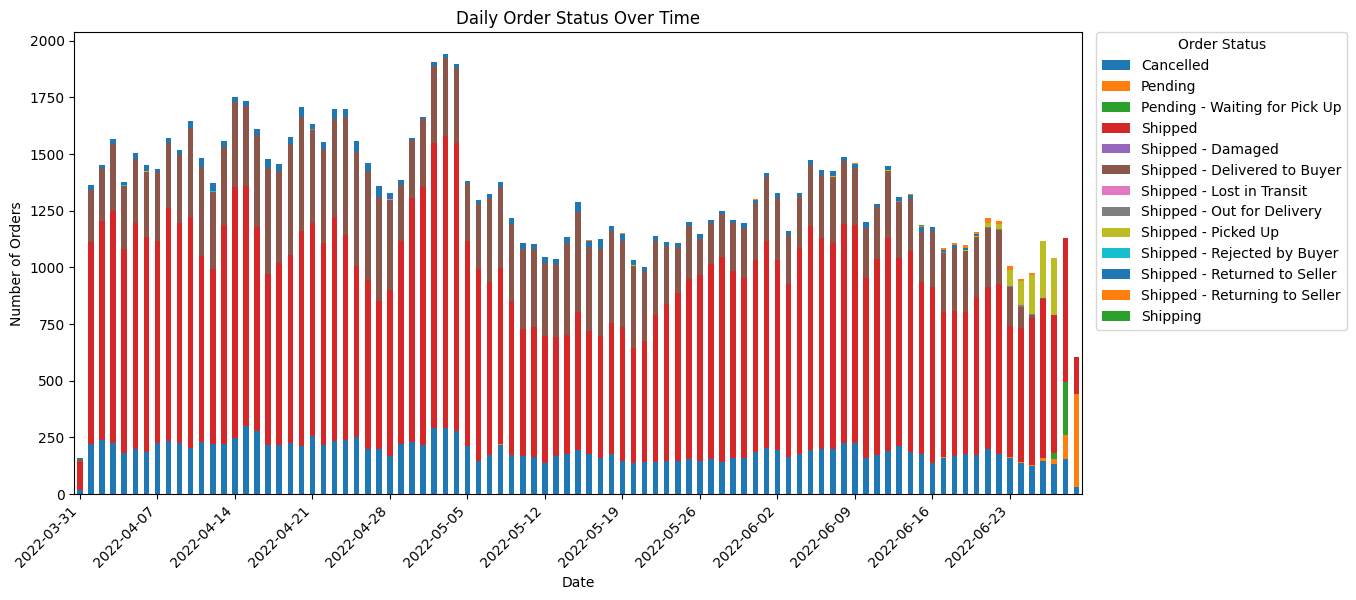

In [5]:
# Visualization: Stacked Bar Chart of Daily Order by Status

fig1, ax1 = plt.subplots(figsize=(13, 6)) # create a figure size and axis variable

df_daily_pivot.plot(kind='bar', stacked=True, ax=ax1) # create the stacked bar chart

ax1.set_xticks(range(0, len(df_daily_pivot.index), 7)) # set x-ticks to show every 7 days
ax1.set_xticklabels(df_daily_pivot.index.strftime('%Y-%m-%d')[::7], rotation=45, ha='right') # format x ticks labels to show date properly, skip to show every 7 days, and make sure the labels aligned with the tick
ax1.set_xlabel("Date") # set x-axis label

ax1.set_ylabel("Number of Orders") # set y-axis label

ax1.legend(bbox_to_anchor=(1.27, 1.015), loc='upper right', title='Order Status') # set the legend outside the plot
ax1.set_title('Daily Order Status Over Time') # set the title of the plot

plt.show() # show the plot

### Findings

Based on this daily order by status, it seems like it has kind of *seasonal* order pattern but we need to analyze further for this. But from this raw daily trend it self, in **April** it has the biggest order among other months and we have the **peak** order on **late April - early May**.

## Visualization #2

i still use stacked-bar chart for the 2nd visualization task, to see the breakdown of category

In [6]:
# Load Monthly Category Sales Data
df_monthly_sales = conn.execute("SELECT * FROM monthly_category_sales").df()

with the same 1st visualization's reason, we required to pivot the data

In [7]:
df_sales_pivot = df_monthly_sales.pivot_table(index=pd.Grouper(key='month', freq="ME"), columns="Category", values="total_amount") # pivot the dataframe to match matplotlib requirement

df_sales_pivot

Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
month,,,,,,,,,
2022-03-31,280.00,NaN,NaN,1099.00,NaN,53884.00,4511.00,7653.28,34256.57
2022-04-30,195583.21,63308.45,NaN,250666.65,55655.24,15506675.56,1821893.22,2927780.51,8017145.48
2022-05-31,159794.68,50866.57,NaN,293092.34,41536.62,12643698.35,1995607.16,4381304.41,6660576.62
2022-06-30,102750.29,36492.96,915.0,246359.67,26741.90,10999866.12,1525780.92,3899334.49,6587568.03


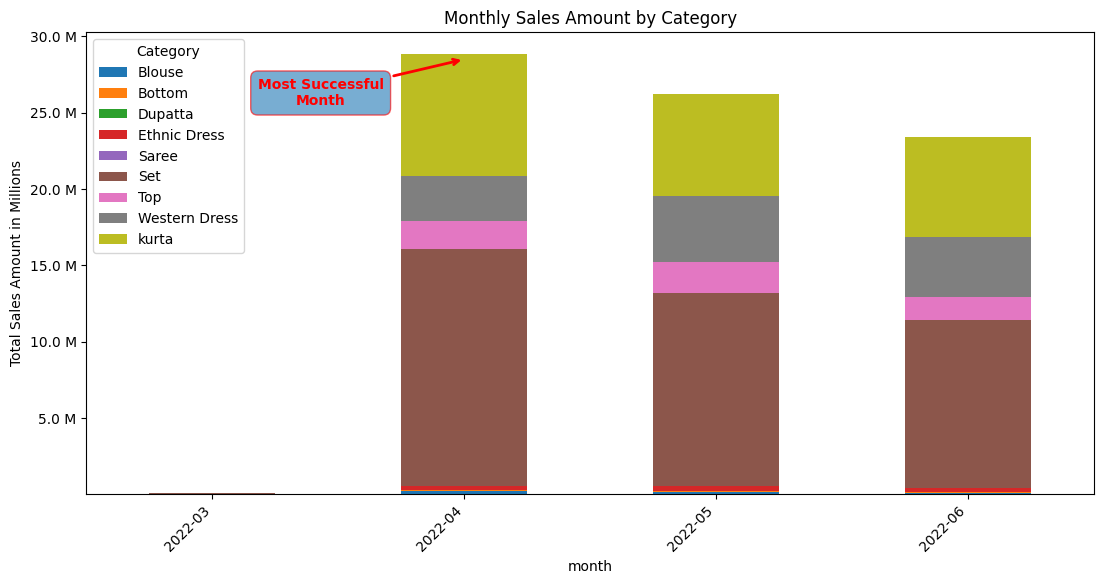

In [8]:
# Visualization 2: Stacked Bar Chart of Daily Order by Status

fig2, ax2 = plt.subplots(figsize=(13, 6)) # create a figure size and axis variable

df_sales_pivot.plot(kind='bar', stacked=True, rot=45, ax=ax2) # create the stacked bar chart

ax2.set_xticklabels(df_sales_pivot.index.strftime('%Y-%m'), rotation=45, ha='right') # format x ticks labels to show date properly

# create a function to format y-axis labels into millions
def millions(x, pos):
    return f'{x * 1e-6:.1f} M'

ax2.yaxis.set_major_formatter(FuncFormatter(millions)) # apply the formatter to y-axis

# create annotation to highlight the most successful month
ax2.annotate('Most Successful\nMonth', 
            xy=(1, 28.5e6),  # point to the top of April bar
            xytext=(0.43, 25.5e6),  # position of text
            fontsize=10, # font size
            color='red', # font color
            fontweight='bold', # font weight
            ha='center', # alignment
            arrowprops=dict(arrowstyle='->', color='red', lw=2), # arrow formatting
            bbox=dict(boxstyle='round,pad=0.5', edgecolor='red', alpha=0.6) # box formatting
            )

ax2.set_ylabel("Total Sales Amount in Millions") # name the y-axis
ax2.set_title("Monthly Sales Amount by Category") # set the title of the plot

plt.show() # show the plot

### Findings

Based on total revenue we can easily tell April is the most profitable month in the dataset and the trend is declined from month to month until June.

# Additional Findings

Load Raw Data

In [9]:
# Load Raw Amazon Data

df_raw = conn.execute("SELECT * FROM raw_amazon_data").df()

Based on Kaggle Documentation, here's the columns explanation:

Suggest Edits
This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size and Color, to help optimize product profitability
- Category: Type of product. (String)
- Size: Size of the product. (String)
- Date: Date of the sale. (Date)
- Status: Status of the sale. (String)
- Fulfilment: Method of fulfilment. (String)
- Style: Style of the product. (String)
- SKU: Stock Keeping Unit. (String)
- ASIN: Amazon Standard Identification Number. (String)
- Courier Status: Status of the courier. (String)
- Qty: Quantity of the product. (Integer)
- Amount: Amount of the sale. (Float)
- B2B: Business to business sale. (Boolean)
- Currency: The currency used for the sale. (String)

From that columns definition, we have to check the actual data first.

In [10]:
# get top 5 rows of the dataframe

df_raw.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,None,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,None,False,Easy Ship,None
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,None
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,None,None
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,None,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,None,False,Easy Ship,None
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,None,False,None,None


Based on top 5 data, we already see that fulfilled-by on index no.2 is missing. Meaning that we have to pass data cleaning phase first.

and there's a unnecessary columns called "Unnamed: 22" and "index" we need to remove this! 

## Data Cleaning

In [11]:
# remove unnecessary column

df_raw.drop(columns=["Unnamed: 22", "index"], inplace=True)

In [12]:
# check for missing values in each column

df_missing_values = pd.DataFrame(df_raw.isna().sum().sort_values(ascending=False), columns=['missing_count']) # create a dedicated dataframe for this missing values

df_missing_values['missing_percentage'] = df_missing_values['missing_count']/ len(df_raw) * 100 # create a new columns to show the percentage of missing values

df_missing_values

,missing_count,missing_percentage
fulfilled-by,89698,69.546811
promotion-ids,49153,38.110487
Amount,7795,6.043807
currency,7795,6.043807
Courier Status,6872,5.328164
ship-city,33,0.025586
ship-country,33,0.025586
ship-postal-code,33,0.025586
ship-state,33,0.025586
Sales Channel,0,0.000000


### Missing Values

Here's my hypothesis about this missing values

- **fulfilled-by** have a tons of missing values which is almost 70% — need to analyze if this missing values is intended or not.
- **Promotion** have ~38%, this seems kind of make sense since i maybe some of the order is not using any promotion,
- **Currency** and **Amount** have a identical missing values, might be correlated one to another.
- **ship-city, ship-state, ship-country, ship-postal-code** also have identical missing values one to another, same as currency and amount they might have a correlation.

#### Fulfilled-by

In [13]:
# take 10 sample of rows where 'fulfilled-by' is null

df_raw[df_raw['fulfilled-by'].isnull()].sample(n=10)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
114756,406-6095386-1358704,2022-06-10,Shipped,Amazon,Amazon.in,Expedited,JNE3459,JNE3459-KR-XXXL,kurta,3XL,B08BFWC9FF,Shipped,1,INR,399.0,BENGALURU,KARNATAKA,560043.0,IN,None,False,None
117572,408-9206409-8645128,2022-06-08,Shipped,Amazon,Amazon.in,Expedited,J0335,J0335-DR-L,Western Dress,L,B09831T4CQ,Shipped,1,INR,1294.0,GURUGRAM,HARYANA,122001.0,IN,None,False,None
24997,404-4190634-7084334,2022-04-15,Shipped,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XL,kurta,XL,B082W8BXW1,Shipped,1,INR,376.0,KURUKSHETRA,HARYANA,136118.0,IN,None,False,None
5736,408-6368034-6237963,2022-04-27,Shipped,Amazon,Amazon.in,Standard,SET331,SET331-KR-NP-XL,Set,XL,B09NQ51CH7,Shipped,1,INR,0.0,BYASANAGAR,ODISHA,755019.0,IN,None,False,None
71184,406-7261385-1237130,2022-05-14,Cancelled,Amazon,Amazon.in,Expedited,SET339,SET339-KR-NP-XXXL,Set,3XL,B09RSVRX2Y,Unshipped,1,INR,736.0,Bangalore,KARNATAKA,560018.0,IN,None,False,None
117400,402-2209124-0547547,2022-06-08,Shipped,Amazon,Amazon.in,Expedited,JNE3799,JNE3799-KR-XXL,kurta,XXL,B09SDYBW5P,Shipped,1,INR,626.0,MUMBAI 400102,MAHARASHTRA,400102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None
61815,407-8349437-4957125,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,SET333,SET333-KR-DPT-XS,Set,XS,B09RKDYFFP,Shipped,1,INR,967.0,HYDERABAD,TELANGANA,500001.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None
126607,402-5408365-5989959,2022-06-02,Cancelled,Amazon,Amazon.in,Expedited,J0402,J0402-DR-L,Western Dress,L,B09SDXW42C,Cancelled,0,None,NaN,BELA PRATAPGARH,UTTAR PRADESH,230001.0,IN,None,False,None
49140,408-2175420-0642741,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE2307,JNE2307-KR-572-M,kurta,M,B07JKQ3CGF,Shipped,1,INR,316.0,BENGALURU,KARNATAKA,560028.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None
66256,405-2661476-6946737,2022-05-18,Cancelled,Amazon,Amazon.in,Expedited,MEN5028,MEN5028-KR-XXXL,kurta,3XL,B08YYTKV6N,Cancelled,0,None,NaN,KANPUR,UTTAR PRADESH,208017.0,IN,None,False,None


In a glance, we can see that if the ship-service-level = "Expedited" causing the fulfilled-by is missing, we can try to check the distribution with pivot table

In [14]:
# pivot table to check the distribution of 'fulfilled-by' against 'ship-service-level'

df_raw.pivot_table(
    index='ship-service-level',
    columns=df_raw['fulfilled-by'].fillna('NULL'),
    aggfunc='size',
    fill_value=0
)

fulfilled-by,Easy Ship,NULL
ship-service-level,,
Expedited,0,88615
Standard,39277,1083


Pivot table above verified that all Expedited ship-service-level causing NULL for the fulfilled-by

Based on this findings, we don't need to treat anything to this columns!

#### promotion-ids	

In [15]:
# take 10 sample of rows where 'promotion-id' is null

df_raw[df_raw['promotion-ids'].isnull()].sample(n=10)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
13662,407-8489880-0468336,2022-04-22,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-XXXL,kurta,3XL,B081WZ4T3V,Shipped,1,INR,399.0,NOIDA,UTTAR PRADESH,201304.0,IN,None,False,None
62377,402-0457626-7143546,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-L,kurta,L,B08WPR181B,Shipped,1,INR,471.0,KALYAN,MAHARASHTRA,421301.0,IN,None,False,None
46061,407-8204545-5172312,2022-04-02,Cancelled,Amazon,Amazon.in,Expedited,JNE3399,JNE3399-KR-XL,kurta,XL,B082W8B28G,Cancelled,0,None,NaN,HYDERABAD,TELANGANA,500050.0,IN,None,False,None
109898,404-4290270-7752314,2022-06-13,Shipped,Amazon,Amazon.in,Expedited,JNE3559,JNE3559-KR-L,kurta,L,B08QM7Z7QJ,Shipped,1,INR,487.0,NARASAPUR,ANDHRA PRADESH,533251.0,IN,None,False,None
98575,403-7739073-7851567,2022-06-22,Shipped,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-XS,kurta,XS,B08MYV41PX,Shipped,1,INR,369.0,BENGALURU,KARNATAKA,560068.0,IN,None,False,None
53521,406-2498767-6611522,2022-05-28,Shipped,Amazon,Amazon.in,Expedited,J0002,J0002-SKD-L,Set,L,B0894X3VKQ,Shipped,1,INR,1186.0,BENGALURU,KARNATAKA,560066.0,IN,None,False,None
2984,405-4224160-5406744,2022-04-28,Cancelled,Merchant,Amazon.in,Standard,J0335,J0335-DR-XXXL,Western Dress,3XL,B098312LNC,None,0,None,NaN,MUMBAI,MAHARASHTRA,400081.0,IN,None,False,Easy Ship
24432,171-4076747-1297948,2022-04-16,Cancelled,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-XXL,kurta,XXL,B07H7DZXJ5,Unshipped,1,INR,518.0,CHENNAI,TAMIL NADU,600042.0,IN,None,False,None
61586,406-9324145-7261109,2022-05-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-L,Set,L,B08L93V2SR,Cancelled,0,None,NaN,PATNA,BIHAR,800025.0,IN,None,False,None
49514,408-3023078-1103549,2022-05-31,Shipped,Amazon,Amazon.in,Standard,J0119,J0119-TP-XXXL,Top,3XL,B08RYPRVPV,Shipped,1,INR,0.0,MUMBAI,MAHARASHTRA,400093.0,IN,None,False,None


Based on 10 sample of null promotion-ids data, there's no certain behavior or pattern like fullfiled-by previously. Thus, we don't really need to treat this since this might be a normal behavior for an E-Commerce to not have promotion id

#### Amount & Currency

In [16]:
# take 10 sample of rows where 'currency' and 'amount' are null

df_raw[
    (df_raw['currency'].isnull()) | # using or clause to validate both columns have a correlation
    (df_raw['Amount'].isnull())
].sample(n=10, random_state=18) # set random state for reproducibility

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
28809,402-1939023-6302719,2022-04-13,Cancelled,Amazon,Amazon.in,Expedited,J0147,J0147-SET-XL,Set,XL,B091Z8TV5Q,Cancelled,0,None,NaN,Hyderabad,TELANGANA,500089.0,IN,None,False,None
126141,404-6380845-3285101,2022-06-02,Cancelled,Amazon,Amazon.in,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Cancelled,0,None,NaN,HYDERABAD,TELANGANA,500055.0,IN,None,False,None
28807,402-1939023-6302719,2022-04-13,Cancelled,Amazon,Amazon.in,Expedited,J0135,J0135-SET-L,Set,L,B08QGK2BYL,Cancelled,0,None,NaN,Hyderabad,TELANGANA,500089.0,IN,None,False,None
88297,406-8611855-0052322,2022-05-02,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-XL,Western Dress,XL,B099NQJZPQ,None,0,None,NaN,WARANGAL,TELANGANA,506370.0,IN,None,False,Easy Ship
115217,405-9496181-2424365,2022-06-10,Cancelled,Amazon,Amazon.in,Expedited,JNE3810,JNE3810-KR-XL,kurta,XL,B09RKD4R6C,Cancelled,0,None,NaN,Pune,MAHARASHTRA,411009.0,IN,None,False,None
96540,408-6774987-7409950,2022-06-24,Cancelled,Amazon,Amazon.in,Expedited,JNE3401,JNE3401-KR-S,kurta,S,B082W88H1Z,Cancelled,0,None,NaN,Majorda,GOA,403713.0,IN,None,False,None
3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,L,B075ZTMFJX,Unshipped,1,None,NaN,Surat,Gujarat,394210.0,IN,None,False,None
93872,402-6061841-1433135,2022-06-27,Cancelled,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-XXXL,Western Dress,3XL,B09SDY4VDC,Cancelled,0,None,NaN,PORT BLAIR,ANDAMAN & NICOBAR,744101.0,IN,None,False,None
40227,407-4036065-6549150,2022-04-06,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XL,kurta,XL,B082W8BXW1,Cancelled,0,None,NaN,BENGALURU,KARNATAKA,560035.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None
112172,405-7911409-0886764,2022-06-12,Cancelled,Amazon,Amazon.in,Expedited,SET324,SET324-KR-NP-XS,Set,XS,B09NQ4DD29,Cancelled,0,None,NaN,MAHOOR,MAHARASHTRA,431721.0,IN,None,False,None


Based on the data above, at a glance we can sense that all Cancelled Status causing the amount and currency to be null. But that is not the case for index *3632*, it appears to be shipped and still has amount and currency to be null. The other things is, we can really see the **Courier Status** might be the cause of this.

In [17]:
# copy the raw dataframe to a new dataframe for manipulation
df_curr_amount = df_raw.copy() 

# create new columns to categorize null and not null values
df_curr_amount['currency_null_category'] = np.where(df_curr_amount['currency'].isnull(), 'NULL', 'Not Null')
df_curr_amount['amount_null_category'] = np.where(df_curr_amount['Amount'].isnull(), 'NULL', 'Not Null')

# pivot table to check the distribution of 'Courier Status' against 'currency_null_category' and 'amount_null_category'
df_curr_amount.pivot_table(
    index='Courier Status',
    columns=['currency_null_category', 'amount_null_category'],
    aggfunc='size',
    fill_value=0
)

currency_null_category,NULL,Not Null
amount_null_category,NULL,Not Null
Courier Status,,
Cancelled,5935,0
Shipped,0,109487
Unshipped,124,6557


From the data above, we can really tell that currency and amount missing values does correlated one to another PLUS we can really tell that all of NULL Amount and Currency because of Cancelled and Unshipped Courier Status.

#### Courier Status

In [18]:
# take 10 sample of rows where 'currency' and 'amount' are null

df_raw[
    (df_raw['Courier Status'].isnull())
].sample(n=10, random_state=52) # set random state for reproducibility

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
114610,171-4480581-2399512,2022-06-10,Cancelled,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-XS,Set,XS,B09RKDQHR3,None,0,INR,1097.32,WEST NIMAR,MADHYA PRADESH,451001.0,IN,None,False,Easy Ship
77136,171-6418668-2840345,2022-05-09,Cancelled,Merchant,Amazon.in,Standard,J0139,J0139-KR-XXL,kurta,XXL,B091XYDRMV,None,0,None,NaN,UNA,HIMACHAL PRADESH,174303.0,IN,None,False,Easy Ship
80673,408-1574155-4097900,2022-05-06,Cancelled,Merchant,Amazon.in,Standard,J0096,J0096-KR-S,kurta,S,B089G356KM,None,0,INR,604.76,KOTA,RAJASTHAN,324009.0,IN,None,False,Easy Ship
28503,403-0456463-7444304,2022-04-13,Cancelled,Merchant,Amazon.in,Standard,JNE3759,JNE3759-KR-XXL,kurta,XXL,B099FC1CGC,None,0,INR,518.10,NAGPUR,MAHARASHTRA,440010.0,IN,None,False,Easy Ship
83736,404-4222801-8918744,2022-05-04,Cancelled,Merchant,Amazon.in,Standard,SET377,SET377-KR-NP-XXL,Set,XXL,B09TZTF5VF,None,0,INR,1105.36,VASAI VIRAR,MAHARASHTRA,401208.0,IN,None,False,Easy Ship
4704,403-9224924-5515513,2022-04-27,Cancelled,Merchant,Amazon.in,Standard,JNE3805,JNE3805-KR-XS,kurta,XS,B09K415WZ1,None,0,INR,437.14,BICHOLIM,GOA,403504.0,IN,None,False,Easy Ship
18740,406-2272069-9937122,2022-04-19,Cancelled,Merchant,Amazon.in,Standard,J0212,J0212-DR-XXL,Ethnic Dress,XXL,B09831RQBB,None,0,INR,753.33,BHOPAL,MADHYA PRADESH,462041.0,IN,None,False,Easy Ship
19758,408-7210754-2868306,2022-04-18,Cancelled,Merchant,Amazon.in,Standard,SET172,SET172-KR-PP-B-M,Set,M,B0822V3NH7,None,0,INR,921.90,Nautanwa,UTTAR PRADESH,273164.0,IN,None,False,Easy Ship
60423,408-3228238-9292366,2022-05-23,Cancelled,Merchant,Amazon.in,Standard,SET158,SET158-KR-PP-XXXL,Set,3XL,B082Z3G31G,None,0,INR,753.33,CHENNAI,TAMIL NADU,600034.0,IN,None,False,Easy Ship
29516,403-3633501-7863526,2022-04-13,Cancelled,Merchant,Amazon.in,Standard,SET183,SET183-KR-DH-M,Set,M,B08B3Z2YY3,None,0,INR,722.86,MUZAFFARPUR,BIHAR,842001.0,IN,None,False,Easy Ship


For NULL Courier Status we can see that all status is Canceled but we have to make sure that is the only case for that 

In [19]:
# pivot table to check the distribution of 'Courier Status' against 'Status'

df_raw.pivot_table(
    index='Status',
    columns=df_raw['Courier Status'].fillna('NULL'),
    aggfunc='size',
    fill_value=0
)

Courier Status,Cancelled,NULL,Shipped,Unshipped
Status,,,,
Cancelled,5840,6861,0,5631
Pending,2,0,10,646
Pending - Waiting for Pick Up,0,0,0,281
Shipped,93,0,77596,115
Shipped - Damaged,0,0,1,0
Shipped - Delivered to Buyer,0,8,28761,0
Shipped - Lost in Transit,0,0,5,0
Shipped - Out for Delivery,0,0,35,0
Shipped - Picked Up,0,0,973,0


From here we can really tell that there are 8 and 3 null values for Shipped - Deliver to Buyer and Shipped - Returned to Seller respectively and dominantly is still on Cancelled Status. We need to check those 11 record first before taking any action

In [20]:
# take 10 sample of rows where 'currency' and 'amount' are null

df_raw[
    df_raw['Courier Status'].isna() &
    df_raw['Status'].isin([
        'Shipped - Delivered to Buyer',
        'Shipped - Returned to Seller'
    ])
]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
18894,408-2656493-8935504,2022-04-19,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET278,SET278-KR-NP-S,Set,S,B0983F2ZJW,None,0,None,NaN,CHINCHANI,MAHARASHTRA,401103.0,IN,None,False,Easy Ship
19292,408-0017934-6791513,2022-04-19,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET288,SET288-KR-NP-XXL,Set,XXL,B09M6TQTGV,None,0,None,NaN,KANNUR,KERALA,670001.0,IN,None,False,Easy Ship
23873,407-5638769-8389162,2022-04-16,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3730,JNE3730-KR-L,kurta,L,B09HLZKJ6G,None,0,None,NaN,GUNTUR,ANDHRA PRADESH,522006.0,IN,None,False,Easy Ship
35337,407-9335911-1673924,2022-04-09,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,MEN5028,MEN5028-KR-XL,kurta,XL,B08YYTL6BX,None,0,None,NaN,GANDHINAGAR,Gujarat,382007.0,IN,None,False,Easy Ship
46852,406-5666781-2979508,2022-04-02,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,MEN5022,MEN5022-KR-M,kurta,M,B08YYV8NZL,None,0,None,NaN,BAREILLY,UTTAR PRADESH,243006.0,IN,None,False,Easy Ship
63344,404-3955601-0129966,2022-05-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0151,J0151-KR-A-XL,kurta,XL,B08N19YB92,None,0,None,NaN,PATIALA,PUNJAB,147001.0,IN,None,False,Easy Ship
65174,407-1289751-6335501,2022-05-18,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,PJNE3252,PJNE3252-KR-N-6XL,kurta,6XL,B09LD24932,None,0,None,NaN,CHENNAI,TAMIL NADU,600017.0,IN,None,False,Easy Ship
71443,171-2697577-5967501,2022-05-13,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-A-S,Western Dress,S,B09TH4P8P7,None,0,None,NaN,CHENNAI,TAMIL NADU,600044.0,IN,None,False,Easy Ship
74296,171-0040661-6643541,2022-05-11,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,SET401,SET401-KR-NP-L,Set,L,B09VC5ZGD8,None,0,None,NaN,ELURU,ANDHRA PRADESH,534001.0,IN,None,False,Easy Ship
75251,408-7380700-0029922,2022-05-10,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,NW012,NW012-TP-PJ-XL,Set,XL,B0922TK8CF,None,0,None,NaN,Lucknow,UTTAR PRADESH,226006.0,IN,None,False,Easy Ship


Based on this observation we cannot really identify the cause of this combination of missing values. Thus, since it only have 11 record in total my decision would be to remove this in the very end of the data cleaning process!

#### ship-city, ship-state, ship-country, ship-postal-code

In [21]:
# take 10 sample of rows where 'ship-city', 'ship-state', 'ship-country', 'ship-postal-code' is null

df_raw[
    (df_raw['ship-city'].isnull()) | # using or clause to validate both columns have a correlation
    (df_raw['ship-state'].isnull()) |
    (df_raw['ship-country'].isnull()) |
    (df_raw['ship-postal-code'].isnull())
].sample(n=10, random_state=18) # set random state for reproducibility

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
37964,407-3064376-9158743,2022-04-08,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,None,0,INR,380.0,None,None,NaN,None,None,False,Easy Ship
18351,405-4927647-8064368,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,INR,1112.0,None,None,NaN,None,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None
60986,171-3257610-9237139,2022-05-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3365,JNE3365-KR-1052-A-L,kurta,L,B07WP5GQKV,Shipped,1,INR,376.0,None,None,NaN,None,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
124357,405-5884153-9925116,2022-06-04,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,INR,486.0,None,None,NaN,None,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None
84008,405-8605864-8021901,2022-05-04,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,JNE1951,JNE1951-KR-155-XXL,kurta,XXL,B07141LX6Q,Shipped,1,INR,368.0,None,None,NaN,None,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,INR,493.0,None,None,NaN,None,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None
104201,403-3190636-2013146,2022-06-18,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0351,J0351-SET-S,Set,S,B09CT88XNF,Shipped,1,INR,792.0,None,None,NaN,None,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
80011,171-4552355-0255565,2022-05-07,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,SET324,SET324-KR-NP-XL,Set,XL,B09NQ4QS13,Shipped,1,INR,607.0,None,None,NaN,None,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
124215,405-0340492-2359532,2022-06-04,Cancelled,Amazon,Amazon.in,Expedited,JNE3465,JNE3465-KR-L,kurta,L,B08BFLKNGJ,Unshipped,1,INR,491.0,None,None,NaN,None,None,False,None
16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,INR,376.0,None,None,NaN,None,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


With all of this 10 out of 33 records, of location missing values columns we cannot really tell why is this happening and it seems like it just completely random missing values. But one thing that we know, this ship columns are linked one to another.

In [22]:
# check the percentage of 'Amount' where 'ship-city', 'ship-state', 'ship-country', 'ship-postal-code' is null

print(f'Percentage of missing Amount where ship-city, ship-state, ship-country, or ship-postal-code is null: {
    df_raw[
    (df_raw['ship-city'].isnull()) | 
    (df_raw['ship-state'].isnull()) |
    (df_raw['ship-country'].isnull()) |
    (df_raw['ship-postal-code'].isnull())
]['Amount'].sum() / df_raw['Amount'].sum() * 100:.2f} %')

Percentage of missing Amount where ship-city, ship-state, ship-country, or ship-postal-code is null: 0.02 %


this 33 missing values only have 0.02 % from total amount of money collected in the DB. My decision would be to remove this missing values just in case we want to create a machine learning later.

In [23]:
# Create a new Clean Dataframe
df_clean = df_raw.copy()


# clean for 11 records of uncertain missing values for Courier Status

df_clean = df_clean[
    ~(
        df_clean['Courier Status'].isna() &
        df_clean['Status'].isin([
            'Shipped - Delivered to Buyer',
            'Shipped - Returned to Seller'
        ])
    )
]

# clean for missing shipping address information
df_clean = df_raw[
    (df_raw['ship-city'].notnull()) | 
    (df_raw['ship-state'].notnull()) |
    (df_raw['ship-country'].notnull()) |
    (df_raw['ship-postal-code'].notnull()) 
]

## Analysis

### Order Status

To check the health of the delivery, the easiest way is to check the Status columns and check the rate of success vs unsuccess order

In [30]:
# check the unique order count by Status in the cleaned dataframe

df_clean.groupby(['Status'])[['Order ID']].nunique()

,Order ID
Status,
Cancelled,17179
Pending,584
Pending - Waiting for Pick Up,262
Shipped,72814
Shipped - Damaged,1
Shipped - Delivered to Buyer,26559
Shipped - Lost in Transit,4
Shipped - Out for Delivery,32
Shipped - Picked Up,918


From the data above we can really tell that there are several values that's redundant like Shipped and Shipped - Delivered to Buyer. We can create a new columns that categorized this to be more compact and readable.

I'll create a new columns that contains 4 values only:
1. Shipped Success -> Shipped, Shipped - Delivered to Buyer
2. Cancelled or Unsuccess -> Cancelled, Shipped - Lost in Transit, Shipped - Rejected by Buyer, Shipped - Returned to Seller, Shipped - Returning to Seller, Shipped - Damaged
3. Pending -> 584
4. On Progress -> The rest of values

In [ ]:
# Create a function to categorize Status into 4 main categories
def categorize_status(status):
    shipped_success = [
        'Shipped',
        'Shipped - Delivered to Buyer'
    ]
    cancelled_unsuccess = [
        'Cancelled',
        'Shipped - Lost in Transit',
        'Shipped - Rejected by Buyer',
        'Shipped - Returned to Seller',
        'Shipped - Returning to Seller',
        'Shipped - Damaged'
    ]
    
    if status in shipped_success:
        return 'Shipped Success'
    elif status in cancelled_unsuccess:
        return 'Cancelled or Unsuccess'
    elif status in "Pending":
        return 'Pending'
    else:
        return 'On Progress'

# apply the function to create a new columns 'Status Category'
df_clean['Status Category'] = df_clean['Status'].apply(categorize_status)

C:\Users\User\AppData\Local\Temp\ipykernel_12848\3214033071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Status Category'] = df_clean['Status'].apply(categorize_status)


In [164]:
print("status category unique order count: \n")

# print group by and count unique order id by status category
print(df_clean.groupby(['Status Category'])[['Order ID']].nunique().sort_values(by='Order ID', ascending=False).rename(columns={'Order ID': 'Unique Order Count'}))

# print group by and count unique order id by status category and calculate the percentage
print("\nstatus category percentage : \n")
print(df_clean.groupby(['Status Category'])[['Order ID']].nunique().sort_values(by='Order ID', ascending=False).apply(lambda x: np.round(x/x.sum() * 100, 2)).rename(columns={'Order ID': 'percentage'})) # group by and count unique order id by status category and calculate the percentage

# calculate the total amount lost due to cancelled or unsuccess orders
cancelled_unsuccess_amount = df_clean[df_clean['Status Category'] == 'Cancelled or Unsuccess']['Amount'].sum()
total_amount = df_clean['Amount'].sum()

# print the total amount lost due to cancelled or unsuccess orders
print(f"\nTotal Money that Amazon Lost due to Cancellation and Unsuccess: INR{cancelled_unsuccess_amount/1000000 : .0f} M out of INR{total_amount/1000000 : .0f} M total amount which is around{cancelled_unsuccess_amount/total_amount * 100 : .2f} %")

status category unique order count: 

                        Unique Order Count
Status Category                           
Shipped Success                      99373
Cancelled or Unsuccess               19173
On Progress                           1220
Pending                                584

status category percentage : 

                        percentage
Status Category                   
Shipped Success              82.57
Cancelled or Unsuccess       15.93
On Progress                   1.01
Pending                       0.49

Total Money that Amazon Lost due to Cancellation and Unsuccess: INR 8 M out of INR 79 M total amount which is around 10.57 %


Based on summary above, we know that among all orders, we have ~16% order that Cancelled or Unsuccess, money wise we lost INR 8 Million. This is a huge loss and we need to figure it why does this happen by

Assuming the data is available, data that we need to check are:
- Check the reason behinds cancellation
- Observe and compare time-to-ship for Shipped order and Shipped back with same postal code.

### B2B Opportunity

In [ ]:
# create a group by to see B2B opportunity
print(df_clean.groupby(['B2B']).agg({
    'Amount' : 'sum',
    'Order ID' : 'nunique'
}))

# b2b figures
b2b_amount = df_clean[df_clean['B2B'] == True]['Amount'].sum()
b2b_order_count = df_clean[df_clean['B2B'] == True]['Order ID'].nunique()
b2b_amount_per_order = b2b_amount / b2b_order_count

# b2c figures
b2c_amount = df_clean[df_clean['B2B'] == False]['Amount'].sum()
b2c_order_count = df_clean[df_clean['B2B'] == False]['Order ID'].nunique()
b2c_amount_per_order = b2c_amount / b2c_order_count


print(f"\nB2B Amount per Order : {b2b_amount_per_order:.2f} INR")
print(f"B2C Amount per Order : {b2c_amount_per_order:.2f} INR")
print(f"B2B and B2C Amount per Order Difference : {b2b_amount_per_order - b2c_amount_per_order:.2f} INR (+{(b2b_amount_per_order - b2c_amount_per_order) / b2c_amount_per_order * 100 :.2f} %)")

            Amount  Order ID
B2B                         
False  77982786.51    119556
True     591220.79       794

B2B Amount per Order : 744.61 INR
B2C Amount per Order : 652.27 INR
B2B and B2C Amount per Order Difference : 92.34 INR (+14.16 %)


From here we can really tell that B2B Amount per order is +14.16% more than B2C, this indicating there is a good opportunity to try to push into B2B business. But i think doing business with B2C and B2B is total different game.

Assuming the data is available, data that we need to check are:
- Historical data about how can we get the B2B deals.
- Qualitative data from other team (sales or marketing) about the effort to get this.
- Time from first approach-to-deal with this B2B.

### Most Ordered by City

In [103]:
df_clean

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Status Category
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,None,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,None,False,Easy Ship,Cancelled or Unsuccess
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,Shipped Success
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,None,Shipped Success
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,None,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,None,False,Easy Ship,Cancelled or Unsuccess
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,None,False,None,Shipped Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,None,False,None,Shipped Success
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None,Shipped Success
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,None,False,None,Shipped Success
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,None,Shipped Success


If we can see the ship-city columns, we can really identified that there are some record that is all upper case but there is also a city that have only capital front letters. We need to check it first

In [104]:
# check for most ordered city variations

df_clean[(df_clean['ship-city'] == 'MUMBAI') | (df_clean['ship-city'] == 'Mumbai') | (df_clean['ship-city'] == 'mumbai')]['ship-city'].value_counts()

ship-city
MUMBAI    6126
Mumbai     868
mumbai     115
Name: count, dtype: int64

As you can see, this is validating that the data is not clean enough and we need to clean this

In [107]:
# Create a new cleaned city column 

df_clean['city_clean'] = df_clean['ship-city'].str.title() # clean the city names by converting to title case

C:\Users\User\AppData\Local\Temp\ipykernel_12848\1637431844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['city_clean'] = df_clean['ship-city'].str.title() # clean the city names by converting to title case


In [136]:
# check unique order count by city

df_order_city = df_clean.groupby('city_clean').agg({
    'Order ID' : 'nunique',
    'Amount' : 'sum'
}).sort_values(by='Order ID', ascending=False).rename(columns={'Order ID': 'unique_order_count', 'Amount': 'total_amount'})
df_order_city['total_order'] = df_clean['Order ID'].nunique()
df_order_city['percentage_of_total_orders'] = df_order_city['unique_order_count'] / df_order_city['total_order'] * 100
df_order_city['cumulative_percentage_of_total_orders'] = df_order_city['percentage_of_total_orders'].cumsum()

In [144]:
# categorized by top 50% by Order
top_50 = df_order_city[df_order_city['cumulative_percentage_of_total_orders'] <= 50].index.tolist()

def is_top_50_city(city):
    if city in top_50:
        return city
    else:
        return 'Other'

df_order_city['city_category'] = df_order_city.index.to_series().apply(is_top_50_city)

df_clean_order_city = df_order_city.groupby('city_category').agg({
    'unique_order_count' : 'sum',
    'total_amount' : 'sum'
}).sort_values(by='unique_order_count', ascending=False)

In [146]:
df_clean_order_city['amount_per_order'] = df_clean_order_city['total_amount'] / df_clean_order_city['unique_order_count']

In [165]:
df_clean_order_city

,unique_order_count,total_amount,amount_per_order
city_category,,,
Other,60273,39203546.74,650.432976
Bengaluru,11096,7257748.80,654.086950
Hyderabad,8369,5599822.35,669.114870
Mumbai,6572,4293210.16,653.257785
New Delhi,5948,3952690.20,664.541056
Chennai,5726,3606917.94,629.919305
Pune,4317,2794975.79,647.434744
Kolkata,2687,1682046.99,625.994414
Gurugram,1855,1280854.78,690.487752


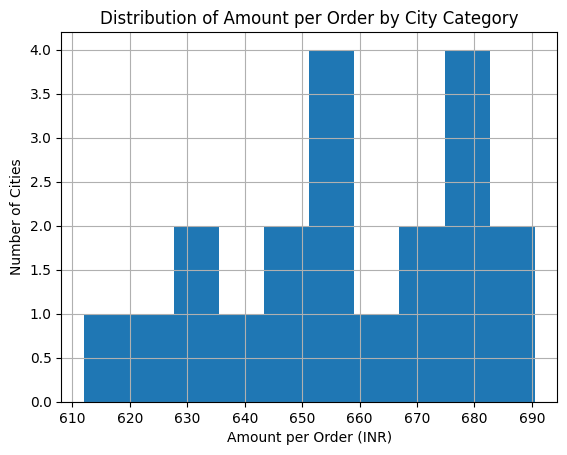

In [163]:
df_clean_order_city.hist('amount_per_order')
plt.title('Distribution of Amount per Order by City Category')
plt.xlabel('Amount per Order (INR)')
plt.ylabel('Number of Cities')
plt.show()

From the histogram chart above, we can know that the ranges of Average sales per order for every city after categorized is not that extreme which is only 80 INR ranges. Meaning that our sales is quite-well distributed to all city available.

## Summary

**1. Order Status**

Among all orders, we have ~16% order that Cancelled or Unsuccess, money wise we lost INR 8 Million. This is a huge loss and we need to figure it why does this happen by

Assuming the data is available, data that we need to check are:
- Check the reason behinds cancellation
- Observe and compare time-to-ship for Shipped order and Shipped back with same postal code.

**2. B2B Opportunity**

B2B Amount per order is +14.16% more than B2C, this indicating there is a good opportunity to try to push into B2B business. But i think doing business with B2C and B2B is total different game.

Assuming the data is available, data that we need to check are:
- Historical data about how can we get the B2B deals.
- Qualitative data from other team (sales or marketing) about the effort to get this.
- Time from first approach-to-deal with this B2B.

**3. Most Ordered by City**

From the histogram chart above, we can know that the ranges of Average sales per order for every city after categorized is not that extreme which is only 80 INR ranges. Meaning that our sales is quite-well distributed to all city available.